In [15]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Step 1: Sample dataset (10 records, 3 features)
data = np.array([
    [2.5, 2.4, 1.2],
    [0.5, 0.7, 0.3],
    [2.2, 2.9, 2.7],
    [1.9, 2.2, 2.4],
    [3.1, 3.0, 1.6],
    [2.3, 2.7, 2.9],
    [2.2, 1.6, 1.1],
    [1.2, 1.4, 0.8],
    [0.6, 2.1, 1.5],
    [0.8, 1.7, 2.9]
])
df = pd.DataFrame(data, columns=['Feature 1', 'Feature 2' , 'Feature 3'])
df

,Feature 1,Feature 2,Feature 3
0,2.5,2.4,1.2
1,0.5,0.7,0.3
2,2.2,2.9,2.7
3,1.9,2.2,2.4
4,3.1,3.0,1.6
5,2.3,2.7,2.9
6,2.2,1.6,1.1
7,1.2,1.4,0.8
8,0.6,2.1,1.5
9,0.8,1.7,2.9


In [3]:
# Step 2: Standardization using pandas (avoids NaN issues)
standardized_data = (df - df.mean()) / df.std()
standardized_data

,Feature 1,Feature 2,Feature 3
0,0.860826,0.453718,-0.580649
1,-1.375086,-1.883618,-1.548397
2,0.525439,1.141170,1.032265
3,0.190053,0.178737,0.709682
4,1.531600,1.278660,-0.150539
5,0.637235,0.866189,1.247320
6,0.525439,-0.646205,-0.688176
7,-0.592517,-0.921185,-1.010759
8,-1.263291,0.041247,-0.258066
9,-1.039699,-0.508714,1.247320


In [4]:
# Step 3: Covariance matrix
cov_matrix = np.cov(standardized_data.T)
cov_matrix

array([[1.        , 0.75641509, 0.23748377],
       [0.75641509, 1.        , 0.61961394],
       [0.23748377, 0.61961394, 1.        ]])

In [5]:
# Step 4: Eigen decomposition
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
eig_vals, eig_vecs

(array([2.10203581, 0.76776346, 0.13020072]),
 array([[-0.56186032, -0.62282368,  0.54442965],
        [-0.66345667, -0.05382713, -0.74627601],
        [-0.49410346,  0.78050836,  0.3829732 ]]))

In [7]:
# Step 5: Sort eigenvalues and eigenvectors
sorted_indices = np.argsort (eig_vals)[::-1]
eig_vals = eig_vals[sorted_indices]
eig_vecs = eig_vecs[:, sorted_indices]
eig_vals, eig_vecs

(array([2.10203581, 0.76776346, 0.13020072]),
 array([[-0.56186032, -0.62282368,  0.54442965],
        [-0.66345667, -0.05382713, -0.74627601],
        [-0.49410346,  0.78050836,  0.3829732 ]]))

In [9]:
# Step 6: Select top 2 eigenvectors
eig_vecs_subset = eig_vecs[:, :2]
eig_vecs_subset

array([[-0.56186032, -0.62282368],
       [-0.66345667, -0.05382713],
       [-0.49410346,  0.78050836]])

In [13]:
# Step 7: Project data to new basis
reduced_data = standardized_data.to_numpy().dot(eig_vecs_subset)
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])

In [12]:
# Step 8: Output the reduced data
print("Reduced Data:")
reduced_df

Reduced Data:


,PC1,PC2
0,-0.497786,-1.013767
1,2.787373,-0.250711
2,-1.562386,0.417009
3,-0.576024,0.425923
4,-1.634499,-1.140240
5,-1.549021,0.530034
6,0.473536,-0.829600
7,1.443498,-0.370288
8,0.809939,0.583164
9,0.305371,1.648476


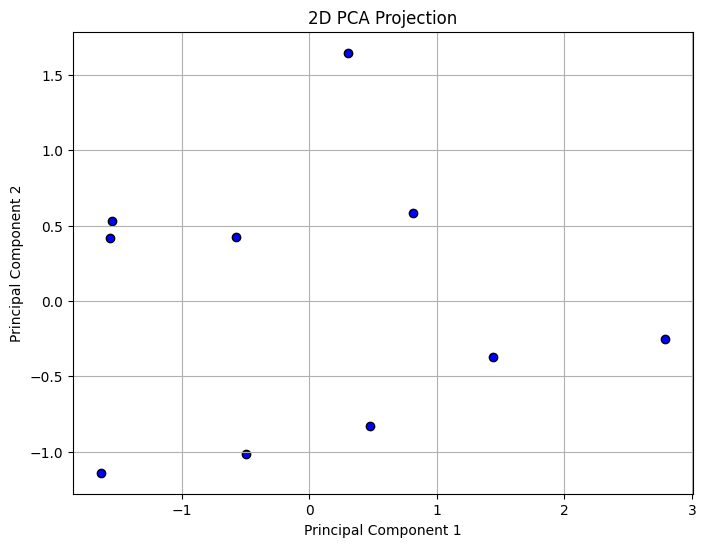

In [14]:
# Step 9: Visualize
plt.figure(figsize=(8, 6))
plt.scatter(reduced_df['PC1'], reduced_df['PC2'], color='blue', edgecolor='k')
plt.title('2D PCA Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()